In [1]:
import pandas as pd
import json

In [8]:
goodreads = pd.read_json('/content/goodreads_metadata.json')
goodreads

,rank,title,author,avg_rating,ratings,reviews,published_date,genres
0,1,The Hunger Games (The Hunger Games #1),Suzanne Collins,4.34 avg rating,"9,305,525 ratings","233,111 reviews","September 14, 2008","[Young Adult, Fiction, Fantasy, Science Fictio..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50 avg rating,"3,612,221 ratings","71,314 reviews","June 21, 2003","[Fantasy, Young Adult, Fiction, Magic, Audiobook]"
2,3,Pride and Prejudice,Jane Austen,4.29 avg rating,"4,512,356 ratings","129,751 reviews","January 28, 1813","[Fiction, Historical Fiction, Historical, Lite..."
3,4,To Kill a Mockingbird,Harper Lee,4.26 avg rating,"6,556,150 ratings","124,946 reviews","July 11, 1960","[Fiction, Historical Fiction, School, Literatu..."
4,5,The Book Thief,Markus Zusak,4.39 avg rating,"2,742,940 ratings","153,125 reviews","September 1, 2005","[Historical Fiction, Fiction, Young Adult, Cla..."
...,...,...,...,...,...,...,...,...
4995,4996,"Finders Keepers (Bill Hodges Trilogy, #2)",Stephen King,4.07 avg rating,"172,705 ratings","13,547 reviews","June 2, 2015","[Horror, Fiction, Thriller, Mystery, Crime]"
4996,4997,Chesapeake,James A. Michener,4.22 avg rating,"26,541 ratings","1,119 reviews","January 1, 1978","[Historical Fiction, Fiction, Historical, Clas..."
4997,4998,Stumbling on Happiness,Daniel Todd Gilbert,3.83 avg rating,"62,579 ratings","3,204 reviews","May 2, 2006","[Psychology, Nonfiction, Self Help, Science, P..."
4998,4999,The Koalemos Initiative,P.H. Wilson,3.82 avg rating,45 ratings,16 reviews,"Published June 26, 2017",[]


In [9]:
import json

In [10]:
file_path = '/content/goodreads_metadata.json'
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# แปลงคอลัมน์ published_date เป็น datetime
df["published_date"] = pd.to_datetime(df["published_date"], errors="coerce")

# สร้างคอลัมน์ใหม่สำหรับไตรมาสและปี
df["release_year"] = df["published_date"].dt.year
df["release_quarter"] = "Q" + df["published_date"].dt.quarter.astype(str)

# บันทึกผลลัพธ์เป็นไฟล์ JSON ใหม่
output_path = "/content/goodreads_with_quarters.json"
df.to_json(output_path, orient="records", indent=4)

print(f"ไฟล์ที่มีข้อมูลไตรมาสถูกบันทึกที่: {output_path}")


ไฟล์ที่มีข้อมูลไตรมาสถูกบันทึกที่: /content/goodreads_with_quarters.json


In [11]:
goodreads_with_quarters = pd.read_json('/content/goodreads_with_quarters.json')
goodreads_with_quarters

,rank,title,author,avg_rating,ratings,reviews,published_date,genres,release_year,release_quarter
0,1,The Hunger Games (The Hunger Games #1),Suzanne Collins,4.34 avg rating,"9,305,525 ratings","233,111 reviews",1.221350e+12,"[Young Adult, Fiction, Fantasy, Science Fictio...",2008.0,Q3.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50 avg rating,"3,612,221 ratings","71,314 reviews",1.056154e+12,"[Fantasy, Young Adult, Fiction, Magic, Audiobook]",2003.0,Q2.0
2,3,Pride and Prejudice,Jane Austen,4.29 avg rating,"4,512,356 ratings","129,751 reviews",-4.952102e+12,"[Fiction, Historical Fiction, Historical, Lite...",1813.0,Q1.0
3,4,To Kill a Mockingbird,Harper Lee,4.26 avg rating,"6,556,150 ratings","124,946 reviews",-2.990304e+11,"[Fiction, Historical Fiction, School, Literatu...",1960.0,Q3.0
4,5,The Book Thief,Markus Zusak,4.39 avg rating,"2,742,940 ratings","153,125 reviews",1.125533e+12,"[Historical Fiction, Fiction, Young Adult, Cla...",2005.0,Q3.0
...,...,...,...,...,...,...,...,...,...,...
4995,4996,"Finders Keepers (Bill Hodges Trilogy, #2)",Stephen King,4.07 avg rating,"172,705 ratings","13,547 reviews",1.433203e+12,"[Horror, Fiction, Thriller, Mystery, Crime]",2015.0,Q2.0
4996,4997,Chesapeake,James A. Michener,4.22 avg rating,"26,541 ratings","1,119 reviews",2.524608e+11,"[Historical Fiction, Fiction, Historical, Clas...",1978.0,Q1.0
4997,4998,Stumbling on Happiness,Daniel Todd Gilbert,3.83 avg rating,"62,579 ratings","3,204 reviews",1.146528e+12,"[Psychology, Nonfiction, Self Help, Science, P...",2006.0,Q2.0
4998,4999,The Koalemos Initiative,P.H. Wilson,3.82 avg rating,45 ratings,16 reviews,NaN,[],NaN,Qnan


In [12]:
goodreads_with_quarters.isnull().sum()

,0
rank,0
title,0
author,0
avg_rating,0
ratings,0
reviews,0
published_date,336
genres,0
release_year,336
release_quarter,0


In [13]:
goodreads_with_quarters = goodreads_with_quarters.dropna(subset=['release_year'])
goodreads_with_quarters.isnull().sum()

,0
rank,0
title,0
author,0
avg_rating,0
ratings,0
reviews,0
published_date,0
genres,0
release_year,0
release_quarter,0


In [14]:
df = pd.DataFrame(goodreads_with_quarters)

df["avg_rating"] = df["avg_rating"].str.extract(r"([\d.]+)").astype(float)

# นับจำนวนหนังสือต่อไตรมาส
books_per_quarter = df["release_quarter"].value_counts()

# คำนวณค่าเฉลี่ยเรตติ้งของแต่ละไตรมาส
avg_rating_per_quarter = df.groupby("release_quarter")["avg_rating"].mean()

# หาว่าไตรมาสไหนมีหนังสือออกเยอะสุด และเรตติ้งดีที่สุด
most_books_quarter = books_per_quarter.idxmax()
best_avg_rating_quarter = avg_rating_per_quarter.idxmax()

best_books_per_quarter = df.loc[df.groupby("release_quarter")["avg_rating"].idxmax(), ["release_quarter", "title", "avg_rating"]]
best_books_per_quarter = df.loc[df.groupby("release_quarter")["avg_rating"].idxmax(), ["release_quarter", "title", "avg_rating"]]

# แสดงผลลัพธ์
print(best_books_per_quarter)

print(f"ไตรมาสที่มีหนังสือออกจำหน่ายมากที่สุด: {most_books_quarter} ({books_per_quarter.max()} เล่ม)")
print(f"ไตรมาสที่มีค่าเฉลี่ยเรตติ้งดีที่สุด: {best_avg_rating_quarter} (เรตติ้งเฉลี่ย {avg_rating_per_quarter.max():.2f})")

     release_quarter                                              title  \
4864            Q1.0  Heaven Official's Blessing: Tian Guan Ci Fu (N...   
159             Q2.0                            The Addiction Manifesto   
283             Q3.0                     The Complete Calvin and Hobbes   
2918            Q4.0                                All the Young Dudes   

      avg_rating  
4864        4.81  
159         4.77  
283         4.81  
2918        4.77  
ไตรมาสที่มีหนังสือออกจำหน่ายมากที่สุด: Q1.0 (1861 เล่ม)
ไตรมาสที่มีค่าเฉลี่ยเรตติ้งดีที่สุด: Q4.0 (เรตติ้งเฉลี่ย 4.11)


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
metadata = pd.read_json('/content/books_into_films_metadata.json')
metadata

,book_title,author,film_adaptation,avg_rating,ratings,reviews,published_date,genres
0,The A.B.C. Murders,Agatha Christie,The Alphabet Murders (1966),4.03 avg rating,"184,121 ratings","11,649 reviews","January 6, 1936","[Mystery, Fiction, Classics, Crime, Mystery Th..."
1,About A Boy,Nick Hornby,About a Boy (2002),3.80 avg rating,"139,041 ratings","4,137 reviews","January 1, 1998","[Fiction, Contemporary, Humor, Novels, British..."
2,The Accidental Tourist,Anne Tyler,The Accidental Tourist (1988),3.90 avg rating,"106,678 ratings","3,166 reviews","August 12, 1985","[Fiction, Contemporary, Romance, Literary Fict..."
3,Adventures Of Huckleberry Finn,Mark Twain,Huckleberry Finn (1920),3.83 avg rating,"1,302,934 ratings","22,722 reviews","February 18, 1884","[Fiction, Classics, Historical Fiction, Litera..."
4,Adventures Of Huckleberry Finn,Mark Twain,Huckleberry Finn (1931),3.83 avg rating,"1,302,934 ratings","22,722 reviews","February 18, 1884","[Fiction, Classics, Historical Fiction, Litera..."
...,...,...,...,...,...,...,...,...
2019,The Wonderful Wizard Of Oz,L. Frank Baum,The Steam Engines of Oz (2018),really liked it 4.00 avg rating,"488,896 ratings","19,643 reviews","May 17, 1900","[Classics, Fantasy, Fiction, Childrens, Young ..."
2020,A Wrinkle In Time,Madeleine L'Engle,A Wrinkle in Time (2003)[N 1],3.98 avg rating,"1,245,618 ratings","41,235 reviews","January 1, 1962","[Fantasy, Fiction, Classics, Young Adult, Scie..."
2021,A Wrinkle In Time,Madeleine L'Engle,A Wrinkle in Time (2018),3.98 avg rating,"1,245,618 ratings","41,235 reviews","January 1, 1962","[Fantasy, Fiction, Classics, Young Adult, Scie..."
2022,The Yearling,Marjorie Kinnan Rawlings,The Yearling (1946),4.03 avg rating,"29,802 ratings","1,523 reviews","January 1, 1938","[Classics, Fiction, Young Adult, Historical Fi..."


In [18]:
file_path = '/content/books_into_films_metadata.json'
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

df["published_date"] = pd.to_datetime(df["published_date"], errors="coerce")

# สร้างคอลัมน์ใหม่สำหรับไตรมาสและปี
df["release_year"] = df["published_date"].dt.year
df["release_quarter"] = "Q" + df["published_date"].dt.quarter.astype(str)

# บันทึกผลลัพธ์เป็นไฟล์ JSON ใหม่
output_path = "/content/metadata_with_quarters.json"
df.to_json(output_path, orient="records", indent=4)

print(f"ไฟล์ที่มีข้อมูลไตรมาสถูกบันทึกที่: {output_path}")


ไฟล์ที่มีข้อมูลไตรมาสถูกบันทึกที่: /content/metadata_with_quarters.json


In [19]:
metadata_with_quarters = pd.read_json('/content/metadata_with_quarters.json')
metadata_with_quarters

,book_title,author,film_adaptation,avg_rating,ratings,reviews,published_date,genres,release_year,release_quarter
0,The A.B.C. Murders,Agatha Christie,The Alphabet Murders (1966),4.03 avg rating,"184,121 ratings","11,649 reviews",-1.072570e+12,"[Mystery, Fiction, Classics, Crime, Mystery Th...",1936.0,Q1.0
1,About A Boy,Nick Hornby,About a Boy (2002),3.80 avg rating,"139,041 ratings","4,137 reviews",8.836128e+11,"[Fiction, Contemporary, Humor, Novels, British...",1998.0,Q1.0
2,The Accidental Tourist,Anne Tyler,The Accidental Tourist (1988),3.90 avg rating,"106,678 ratings","3,166 reviews",4.926528e+11,"[Fiction, Contemporary, Romance, Literary Fict...",1985.0,Q3.0
3,Adventures Of Huckleberry Finn,Mark Twain,Huckleberry Finn (1920),3.83 avg rating,"1,302,934 ratings","22,722 reviews",-2.709763e+12,"[Fiction, Classics, Historical Fiction, Litera...",1884.0,Q1.0
4,Adventures Of Huckleberry Finn,Mark Twain,Huckleberry Finn (1931),3.83 avg rating,"1,302,934 ratings","22,722 reviews",-2.709763e+12,"[Fiction, Classics, Historical Fiction, Litera...",1884.0,Q1.0
...,...,...,...,...,...,...,...,...,...,...
2019,The Wonderful Wizard Of Oz,L. Frank Baum,The Steam Engines of Oz (2018),really liked it 4.00 avg rating,"488,896 ratings","19,643 reviews",-2.197238e+12,"[Classics, Fantasy, Fiction, Childrens, Young ...",1900.0,Q2.0
2020,A Wrinkle In Time,Madeleine L'Engle,A Wrinkle in Time (2003)[N 1],3.98 avg rating,"1,245,618 ratings","41,235 reviews",-2.524608e+11,"[Fantasy, Fiction, Classics, Young Adult, Scie...",1962.0,Q1.0
2021,A Wrinkle In Time,Madeleine L'Engle,A Wrinkle in Time (2018),3.98 avg rating,"1,245,618 ratings","41,235 reviews",-2.524608e+11,"[Fantasy, Fiction, Classics, Young Adult, Scie...",1962.0,Q1.0
2022,The Yearling,Marjorie Kinnan Rawlings,The Yearling (1946),4.03 avg rating,"29,802 ratings","1,523 reviews",-1.009843e+12,"[Classics, Fiction, Young Adult, Historical Fi...",1938.0,Q1.0


In [20]:
metadata_with_quarters.isnull().sum()

,0
book_title,0
author,0
film_adaptation,0
avg_rating,0
ratings,0
reviews,0
published_date,125
genres,0
release_year,125
release_quarter,0


In [21]:
metadata_with_quarters = metadata_with_quarters.dropna(subset=['release_year']).drop(columns = ['published_date'])
metadata_with_quarters.isnull().sum()

,0
book_title,0
author,0
film_adaptation,0
avg_rating,0
ratings,0
reviews,0
genres,0
release_year,0
release_quarter,0


In [22]:
metadata_with_quarters

,book_title,author,film_adaptation,avg_rating,ratings,reviews,genres,release_year,release_quarter
0,The A.B.C. Murders,Agatha Christie,The Alphabet Murders (1966),4.03 avg rating,"184,121 ratings","11,649 reviews","[Mystery, Fiction, Classics, Crime, Mystery Th...",1936.0,Q1.0
1,About A Boy,Nick Hornby,About a Boy (2002),3.80 avg rating,"139,041 ratings","4,137 reviews","[Fiction, Contemporary, Humor, Novels, British...",1998.0,Q1.0
2,The Accidental Tourist,Anne Tyler,The Accidental Tourist (1988),3.90 avg rating,"106,678 ratings","3,166 reviews","[Fiction, Contemporary, Romance, Literary Fict...",1985.0,Q3.0
3,Adventures Of Huckleberry Finn,Mark Twain,Huckleberry Finn (1920),3.83 avg rating,"1,302,934 ratings","22,722 reviews","[Fiction, Classics, Historical Fiction, Litera...",1884.0,Q1.0
4,Adventures Of Huckleberry Finn,Mark Twain,Huckleberry Finn (1931),3.83 avg rating,"1,302,934 ratings","22,722 reviews","[Fiction, Classics, Historical Fiction, Litera...",1884.0,Q1.0
...,...,...,...,...,...,...,...,...,...
2019,The Wonderful Wizard Of Oz,L. Frank Baum,The Steam Engines of Oz (2018),really liked it 4.00 avg rating,"488,896 ratings","19,643 reviews","[Classics, Fantasy, Fiction, Childrens, Young ...",1900.0,Q2.0
2020,A Wrinkle In Time,Madeleine L'Engle,A Wrinkle in Time (2003)[N 1],3.98 avg rating,"1,245,618 ratings","41,235 reviews","[Fantasy, Fiction, Classics, Young Adult, Scie...",1962.0,Q1.0
2021,A Wrinkle In Time,Madeleine L'Engle,A Wrinkle in Time (2018),3.98 avg rating,"1,245,618 ratings","41,235 reviews","[Fantasy, Fiction, Classics, Young Adult, Scie...",1962.0,Q1.0
2022,The Yearling,Marjorie Kinnan Rawlings,The Yearling (1946),4.03 avg rating,"29,802 ratings","1,523 reviews","[Classics, Fiction, Young Adult, Historical Fi...",1938.0,Q1.0


In [23]:
df = pd.DataFrame(metadata_with_quarters)

df["avg_rating"] = df["avg_rating"].str.extract(r"([\d.]+)").astype(float)

# นับจำนวนหนังสือต่อไตรมาส
books_per_quarter = df["release_quarter"].value_counts()

# คำนวณค่าเฉลี่ยเรตติ้งของแต่ละไตรมาส
avg_rating_per_quarter = df.groupby("release_quarter")["avg_rating"].mean()

most_books_quarter = books_per_quarter.idxmax()
best_avg_rating_quarter = avg_rating_per_quarter.idxmax()

best_books_per_quarter = df.loc[df.groupby("release_quarter")["avg_rating"].idxmax(), ["release_quarter", "book_title", "avg_rating"]]
best_books_per_quarter = df.loc[df.groupby("release_quarter")["avg_rating"].idxmax(), ["release_quarter", "book_title", "avg_rating"]]

print(best_books_per_quarter.to_string(index=False))

print(f"ไตรมาสที่มีหนังสือออกจำหน่ายมากที่สุด: {most_books_quarter} ({books_per_quarter.max()} เล่ม)")
print(f"ไตรมาสที่มีค่าเฉลี่ยเรตติ้งดีที่สุด: {best_avg_rating_quarter} (เรตติ้งเฉลี่ย {avg_rating_per_quarter.max():.2f})")

release_quarter                                       book_title  avg_rating
           Q1.0                                      Martin Eden        4.48
           Q2.0                                  A Monster Calls        4.35
           Q3.0                                   The Book Thief        4.39
           Q4.0 The Mortal Instruments – Book One: City Of Bones        4.55
ไตรมาสที่มีหนังสือออกจำหน่ายมากที่สุด: Q1.0 (1069 เล่ม)
ไตรมาสที่มีค่าเฉลี่ยเรตติ้งดีที่สุด: Q4.0 (เรตติ้งเฉลี่ย 4.03)


In [24]:
from collections import Counter

file_path = "metadata_with_quarters.json"

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# รวมแนวหนังสือทั้งหมดจากทุกเล่ม
all_genres = [genre for book in data if "genres" in book for genre in book["genres"]]

# นับจำนวนแนวหนังสือ
genre_counts = Counter(all_genres)

# หาหมวดหมู่ที่มีจำนวนมากที่สุด
most_common_genres = genre_counts.most_common(10)  # 10 แนวที่พบมากที่สุด

# แสดงผลลัพธ์
print("แนวหนังสือที่มีจำนวนมากที่สุด:")
for genre, count in most_common_genres:
    print(f"{genre}: {count} เล่ม")


แนวหนังสือที่มีจำนวนมากที่สุด:
Fiction: 1854 เล่ม
Classics: 1356 เล่ม
Historical Fiction: 825 เล่ม
Literature: 608 เล่ม
Fantasy: 591 เล่ม
Adventure: 462 เล่ม
Young Adult: 461 เล่ม
Childrens: 388 เล่ม
Horror: 297 เล่ม
Gothic: 236 เล่ม


In [25]:
metadata_with_quarters.dtypes

,0
book_title,object
author,object
film_adaptation,object
avg_rating,object
ratings,object
reviews,object
genres,object
release_year,float64
release_quarter,object


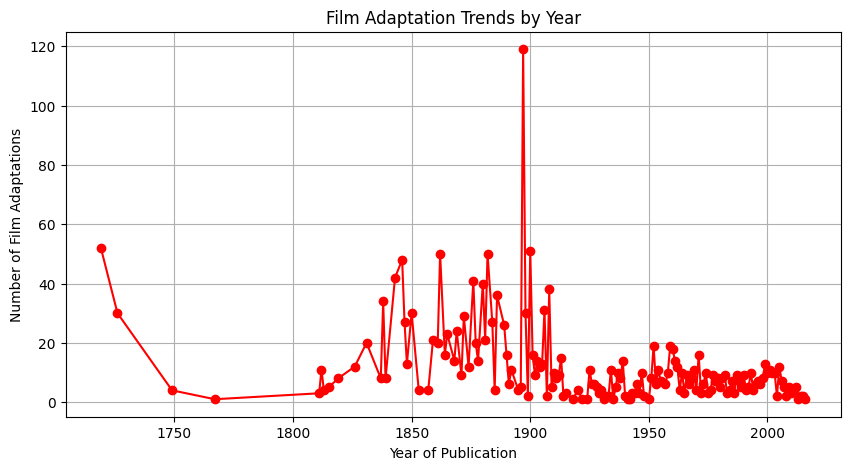


นักเขียนที่มีผลงานถูกนำไปสร้างเป็นภาพยนตร์มากที่สุด:
Charles Dickens: 152 เรื่อง
Alexandre Dumas, Père: 132 เรื่อง
Mark Twain: 114 เรื่อง
Bram Stoker: 110 เรื่อง
Robert Louis Stevenson: 83 เรื่อง
Jules Verne: 74 เรื่อง
Victor Hugo: 70 เรื่อง
Jack London: 57 เรื่อง
Daniel Defoe: 52 เรื่อง
L. Frank Baum: 48 เรื่อง

แนวหนังสือที่ได้รับความนิยมสูงสุด (ค่าเฉลี่ยเรตติ้งสูงสุด):
South Africa: 4.35
Jewish: 4.34
World War II: 4.29
Magic: 4.29
Picture Books: 4.28
Baseball: 4.27
Business: 4.27
Economics: 4.27
Urban Fantasy: 4.26
Swedish Literature: 4.25

แนวหนังสือที่มีจำนวนหนังสือมากที่สุด:
Fiction: 1772 เล่ม
Classics: 1281 เล่ม
Historical Fiction: 820 เล่ม
Literature: 600 เล่ม
Fantasy: 538 เล่ม
Adventure: 462 เล่ม
Young Adult: 391 เล่ม
Childrens: 320 เล่ม
Horror: 295 เล่ม
Gothic: 236 เล่ม


In [26]:
import json
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

file_path = "metadata_with_quarters.json"

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

# 1. แนวโน้มการดัดแปลงเป็นภาพยนตร์ตามช่วงเวลา
film_adaptation_by_year = Counter()
for book in data:
    if "film_adaptation" in book and book["film_adaptation"] and book.get("release_year"):
        year = int(book["release_year"])
        film_adaptation_by_year[year] += 1

sorted_years = sorted(film_adaptation_by_year.keys())
sorted_film_counts = [film_adaptation_by_year[year] for year in sorted_years]

plt.figure(figsize=(10,5))
plt.plot(sorted_years, sorted_film_counts, marker='o', linestyle='-', color='r')
plt.xlabel("Year of Publication")
plt.ylabel("Number of Film Adaptations")
plt.title("Film Adaptation Trends by Year")
plt.grid()
plt.show()

# 2. นักเขียนที่มีผลงานถูกนำไปสร้างเป็นภาพยนตร์บ่อยที่สุด
author_counts = Counter(book["author"] for book in data if "film_adaptation" in book and book["film_adaptation"])

print("\nนักเขียนที่มีผลงานถูกนำไปสร้างเป็นภาพยนตร์มากที่สุด:")
for author, count in author_counts.most_common(10):
    print(f"{author}: {count} เรื่อง")

# 3. ความนิยมของแนวหนังสือ (Genre Popularity)
genre_ratings = {}
genre_counts = Counter()
for book in data:
    if "avg_rating" in book and "genres" in book:
        try:
            rating = float(book["avg_rating"].split()[0])
            for genre in book["genres"]:
                genre_counts[genre] += 1  # นับจำนวนหนังสือต่อแนว
                if genre in genre_ratings:
                    genre_ratings[genre].append(rating)
                else:
                    genre_ratings[genre] = [rating]
        except ValueError:
            continue

# คำนวณค่าเฉลี่ยของเรตติ้งแต่ละแนว
average_rating_by_genre = {genre: np.mean(ratings) for genre, ratings in genre_ratings.items()}

# แสดงแนวหนังสือที่มีค่าเฉลี่ยเรตติ้งสูงสุด
sorted_genres_by_rating = sorted(average_rating_by_genre.items(), key=lambda x: x[1], reverse=True)

print("\nแนวหนังสือที่ได้รับความนิยมสูงสุด (ค่าเฉลี่ยเรตติ้งสูงสุด):")
for genre, avg_rating in sorted_genres_by_rating[:10]:
    print(f"{genre}: {avg_rating:.2f}")

# แสดงแนวหนังสือที่มีจำนวนหนังสือมากที่สุด
sorted_genres_by_count = genre_counts.most_common(10)
print("\nแนวหนังสือที่มีจำนวนหนังสือมากที่สุด:")
for genre, count in sorted_genres_by_count:
    print(f"{genre}: {count} เล่ม")